In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_dir = "/content/drive/MyDrive/detect_fruits/database_Fruit/train"
val_dir = "/content/drive/MyDrive/detect_fruits/database_Fruit/val"

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    image_size=(100, 100),
    seed=42,
    shuffle=True,
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size=32,
    image_size=(100, 100),
    seed=123,
)


Found 4900 files belonging to 7 classes.
Found 1352 files belonging to 7 classes.


In [5]:
class_names = train_ds.class_names
class_names

['apple', 'banana', 'grape', 'kiwi', 'mango', 'orange', 'strawberry']

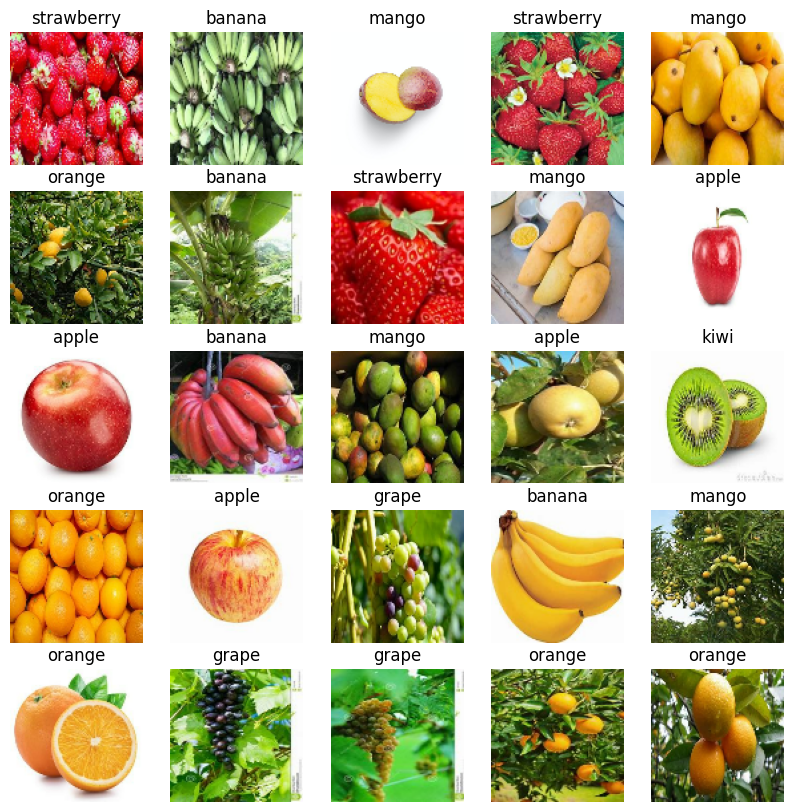

In [6]:
# Function to display images from a dataset
def show_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch from the dataset
        for i in range(25):  # Display 25 images
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Show images from training dataset
show_images(train_ds, class_names)
plt.show()

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/detect_fruits/database_Fruit/train',
                                              target_size=(224, 224),
                                              batch_size=64,
                                               #validation_split=0.2,
                                               subset='training',
                                              class_mode='categorical')

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/detect_fruits/database_Fruit/val',
                                          target_size=(224, 224),
                                          batch_size=64,
                                          #validation_split=0.2,
                                          class_mode='categorical')



Found 4900 images belonging to 7 classes.
Found 1352 images belonging to 7 classes.


In [8]:
for data_batch, labels_batch in val_set:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(64, 224, 224, 3)
(64, 7)


In [9]:
for data_batch, labels_batch in val_set:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(64, 224, 224, 3)
(64, 7)


In [10]:
vgg19 = VGG19(input_shape=[224, 224, 3], weights='imagenet', include_top=False)

# Freeze the convolutional layers to avoid training them
#for layer in vgg19.layers:
    #layer.trainable = False

# Add custom layers on top of VGG19
#x = Flatten()(vgg19.output)
#x = Dense(1024, activation='relu')(x)
#x = Dense(512, activation='relu')(x)
#x = Dense(train_set.num_classes, activation='softmax')(x)
model=Sequential()

model.add(vgg19)

model.add(Flatten())

model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.3))

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(train_set.num_classes,activation="softmax"))


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=15,
    verbose=1,

    #validation_steps=len(val_set)
)

Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 4763s 56s/step - accuracy: 0.1804 - loss: 1.9809 - val_accuracy: 0.4564 - val_loss: 1.6905
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.3678 - loss: 1.6690 - val_accuracy: 0.5828 - val_loss: 1.2166
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5658 - loss: 1.2564 - val_accuracy: 0.7004 - val_loss: 0.8694
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6525 - loss: 0.9920 - val_accuracy: 0.6716 - val_loss: 0.8709
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7011 - loss: 0.7999 - val_accuracy: 0.8018 - val_loss: 0.5486
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7706 - loss: 0.6430 - val_accuracy: 0.8040 - val_loss: 0.5235
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.7996 - loss: 0.5563 - val_accuracy: 0.8077 - val_loss: 0.5286
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8303 - loss: 0.4902 - val_accuracy: 0.8306 -

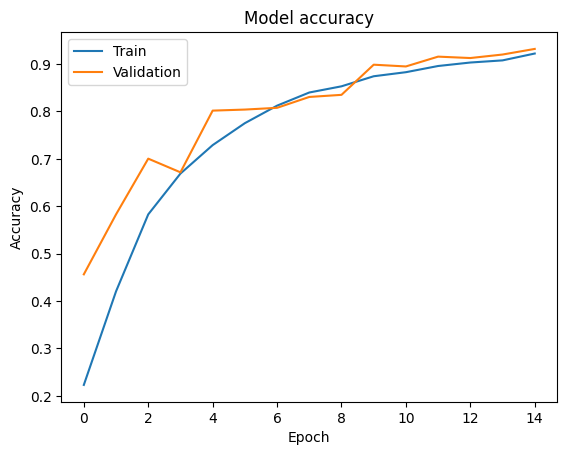

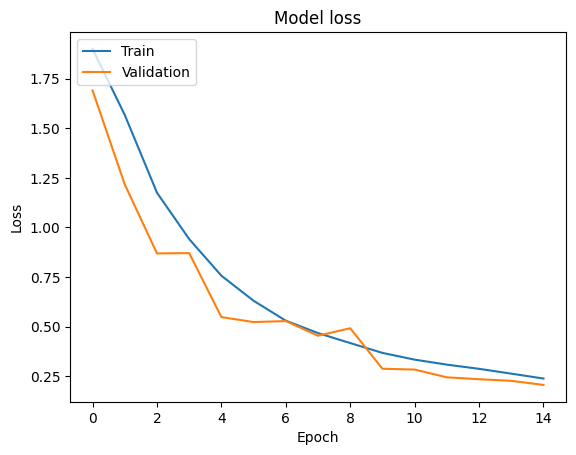

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
model.save('/content/drive/MyDrive/vgg19_model.h5')
model.save_weights('/content/drive/MyDrive/vgg19.weights.h5')